In [1]:
import numpy as np
import pandas as pd
import wrangle_zillow
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Is logerror different based on roomcnt
- is logerror different based on pools
- is logerror different based on airconditioningtype
- is logerror different based on bathrooms
- is logerror different based on threequarterbathnbr
- if we control for fips, does logerror differ across garage_sqft?
- if we control for fips, does logerror differe across aircontype

In [2]:
df, train, validate, test = wrangle_zillow.wrangle_zillow()

opening data from local file


/Users/aharris/codeup-data-science/clustering-exercises/wrangle_zillow.py:16: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('zillow_2017.csv', index_col=0)


SUMMARY REPORT


Dataframe head: 
        id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1727539  14297519                    NaN                       NaN   
1  1387261  17052889                    NaN                       NaN   
2    11677  14186244                    NaN                       NaN   

   basementsqft  bathrooms  bedrooms  buildingclasstypeid  \
0           NaN        3.5       4.0                  NaN   
1           NaN        1.0       2.0                  NaN   
2           NaN        2.0       3.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    NaN                3.5  ...         6.059063e+13   
1                    NaN                1.0  ...         6.111001e+13   
2                    NaN                2.0  ...         6.059022e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       2017-01-01                  NaN         

(0.763, 24.6]     50559
(24.6, 48.2]          2
(48.2, 71.8]          0
(71.8, 95.4]          0
(95.4, 119.0]         0
(119.0, 142.6]        0
(142.6, 166.2]        0
(166.2, 189.8]        0
(189.8, 213.4]        0
(213.4, 237.0]        1
Name: unitcnt, dtype: int64 

(7.819, 329.0]      1635
(329.0, 647.0]       607
(647.0, 965.0]        95
(965.0, 1283.0]       34
(1283.0, 1601.0]       9
(1601.0, 1919.0]       1
(1919.0, 2237.0]       2
(2237.0, 2555.0]       2
(2555.0, 2873.0]       1
(2873.0, 3191.0]       2
Name: yardbuildingsqft17, dtype: int64 

(11.143, 97.6]    24
(97.6, 183.2]     14
(183.2, 268.8]    10
(268.8, 354.4]     7
(354.4, 440.0]     4
(440.0, 525.6]     6
(525.6, 611.2]     2
(611.2, 696.8]     1
(696.8, 782.4]     1
(782.4, 868.0]     1
Name: yardbuildingsqft26, dtype: int64 

(1823.807, 1843.2]        1
(1843.2, 1862.4]          0
(1862.4, 1881.6]          3
(1881.6, 1900.8]         90
(1900.8, 1920.0]       1743
(1920.0, 1939.2]       6688
(1939.2, 1958.4]    

df: (52448, 44)

train: (29370, 44)
validate: (12588, 44)
test: (10490, 44)


In [3]:
df

,id,parcelid,airconditioningtypeid,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,area,finishedsquarefeet12,fips,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,NaN,Single Family Residential
1,1387261,17052889,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,NaN,Single Family Residential
2,11677,14186244,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,NaN,Single Family Residential
3,2288172,12177905,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,NaN,Central,Single Family Residential
6,781532,12095076,1.0,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77374,2274245,12412492,NaN,2.0,4.0,6.0,2.0,1633.0,1633.0,6037.0,...,346534.0,2016.0,221068.0,4175.08,6.037555e+13,0.001082,2017-09-19,NaN,Central,Single Family Residential
77376,673515,11000655,NaN,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,NaN,Central,Single Family Residential
77377,2968375,17239384,NaN,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,NaN,NaN,Single Family Residential
77378,1843709,12773139,1.0,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Central,Single Family Residential


In [4]:
train.shape

(29370, 44)

Univariate distributions

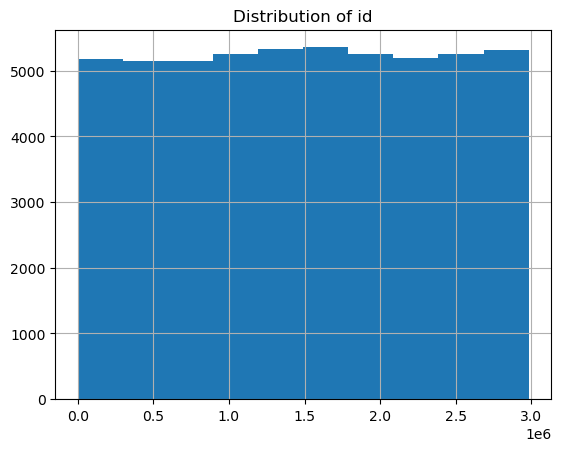

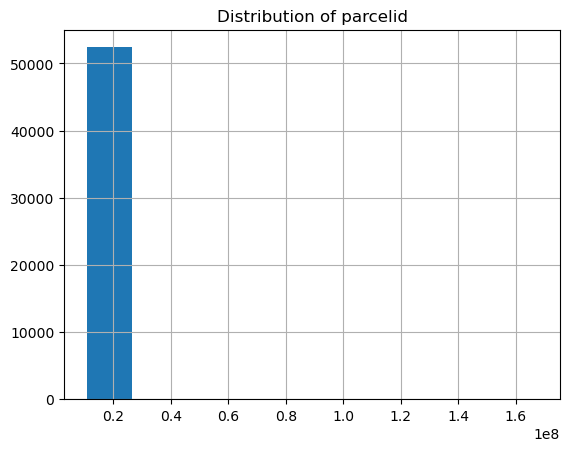

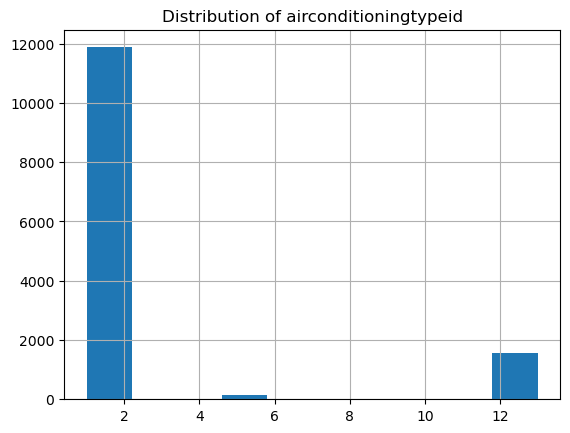

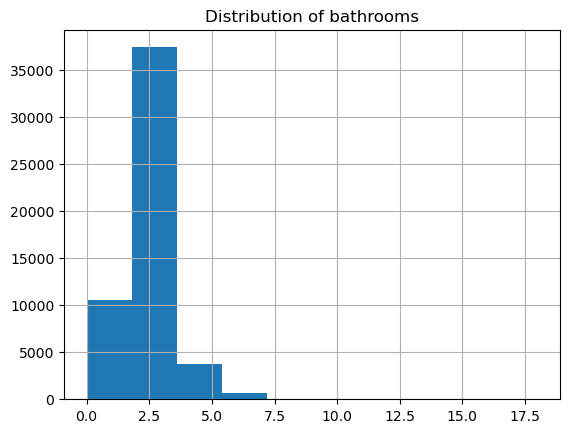

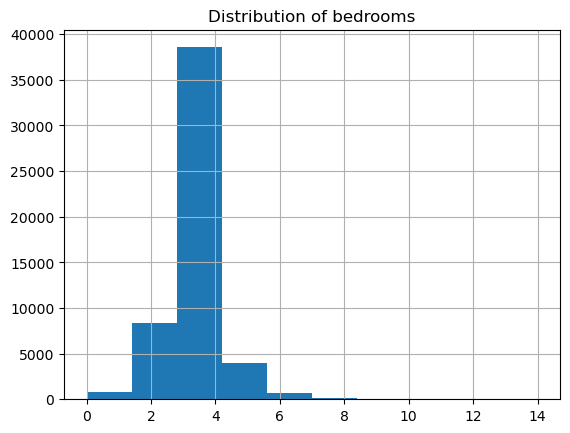

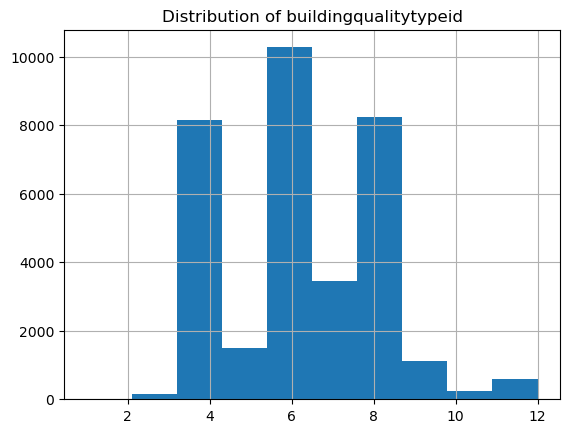

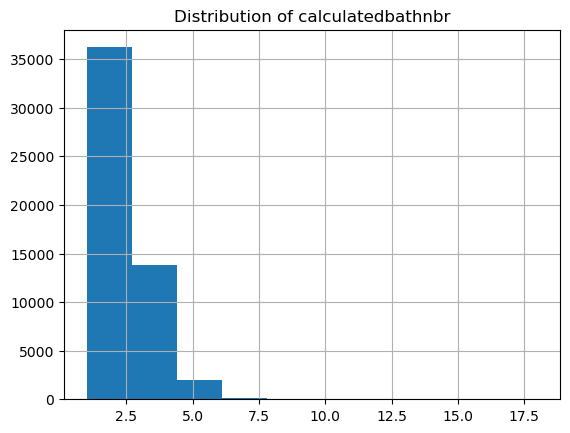

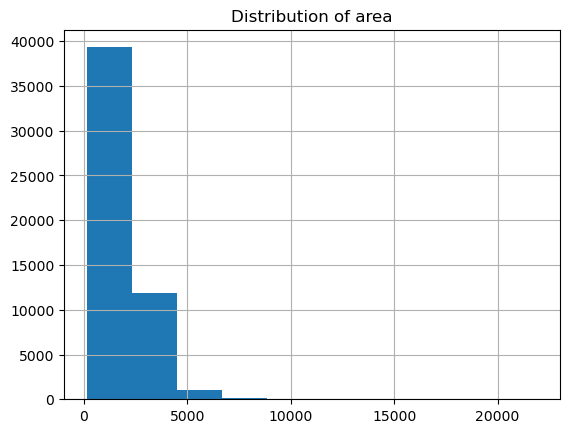

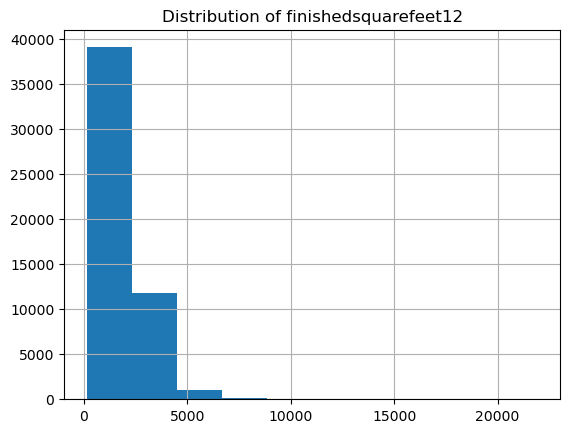

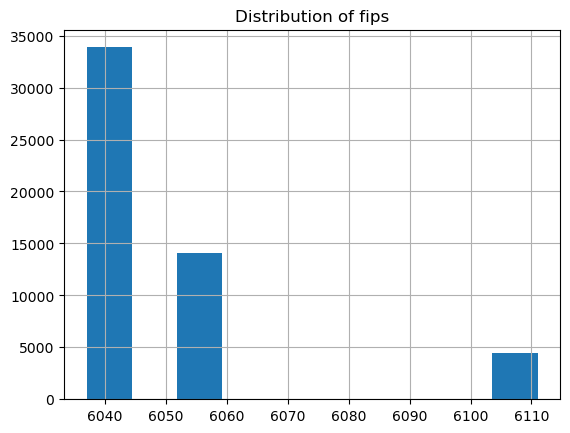

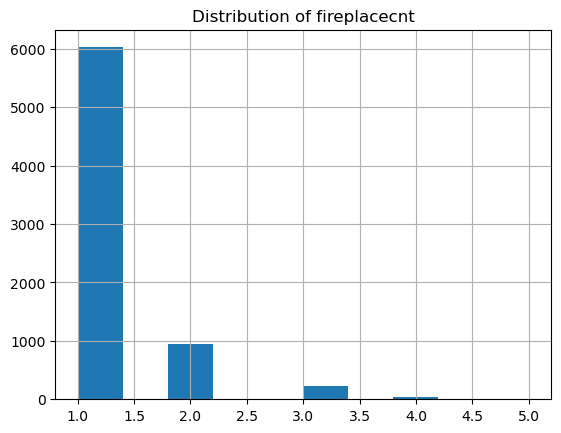

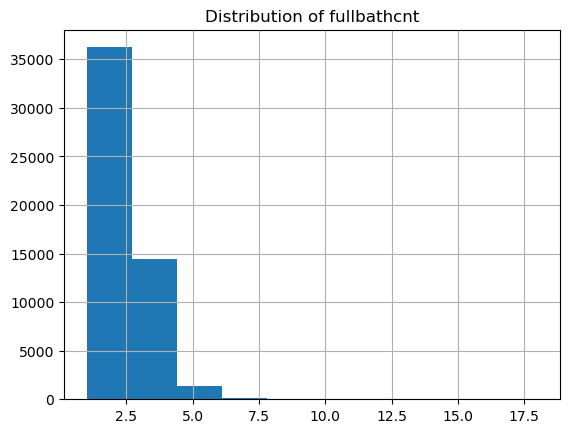

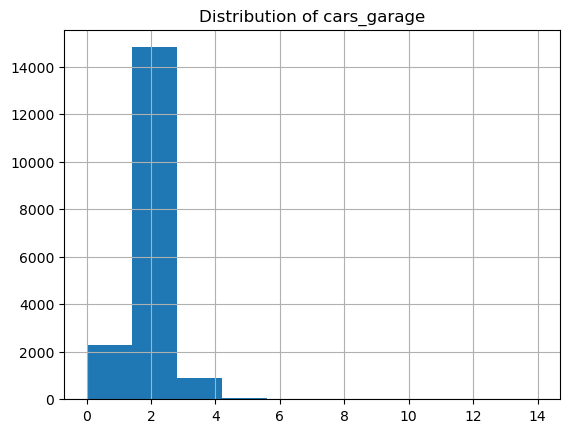

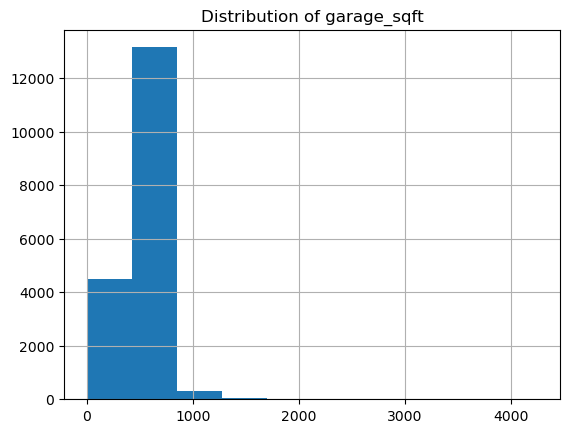

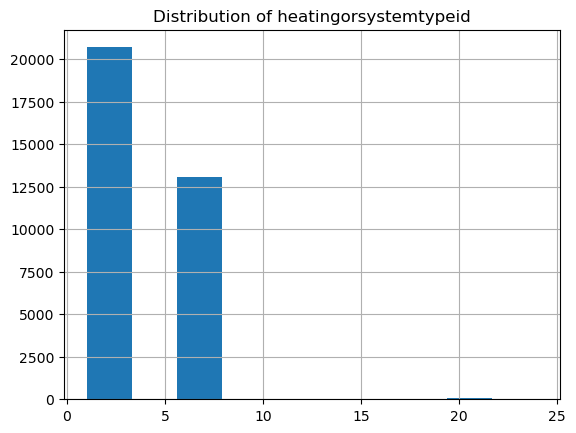

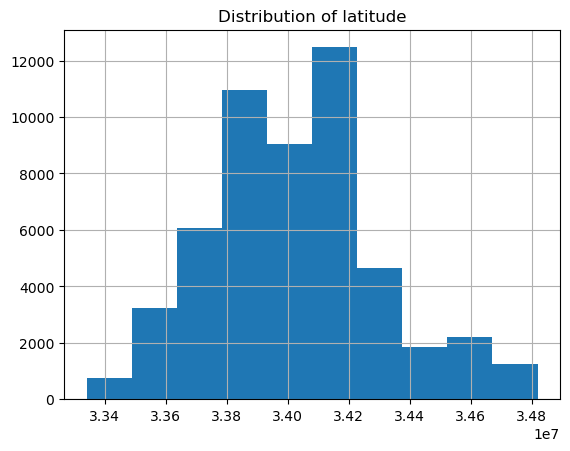

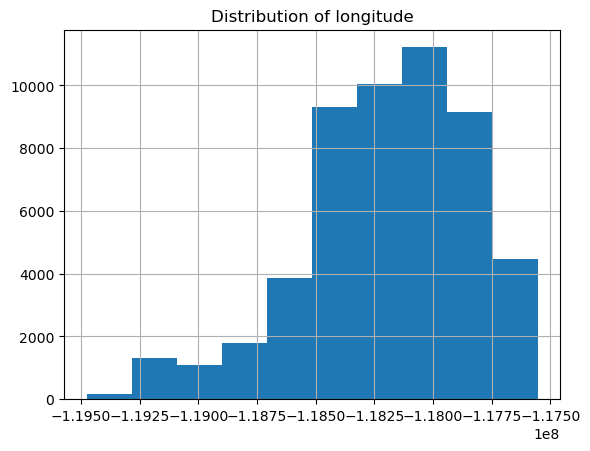

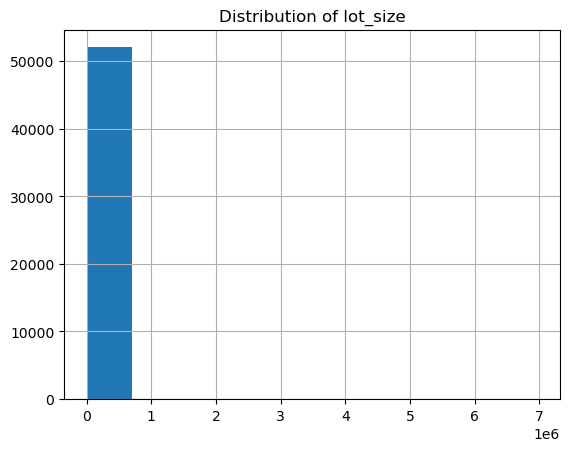

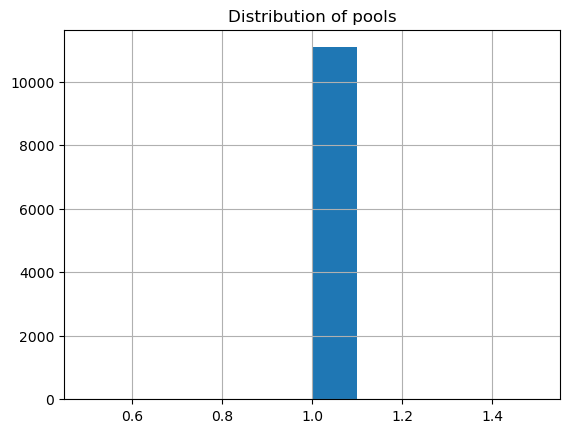

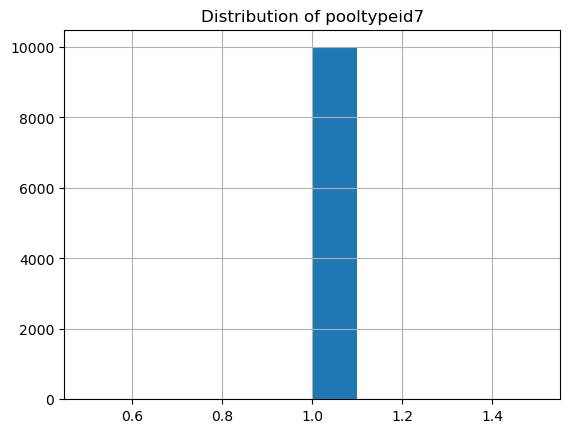

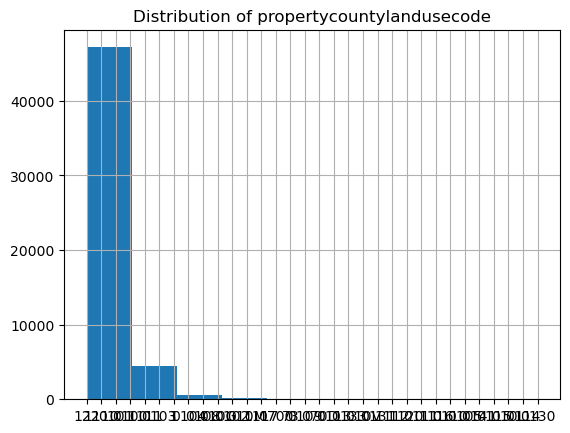

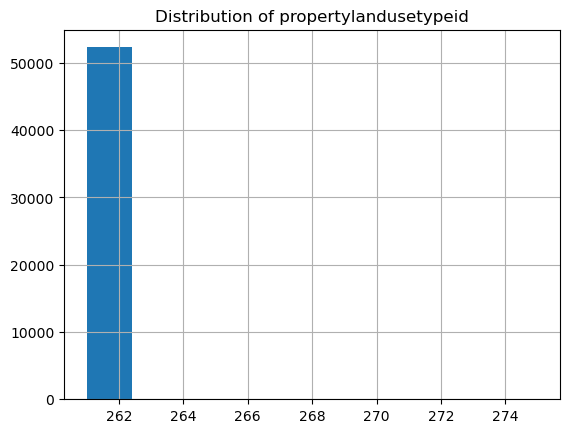

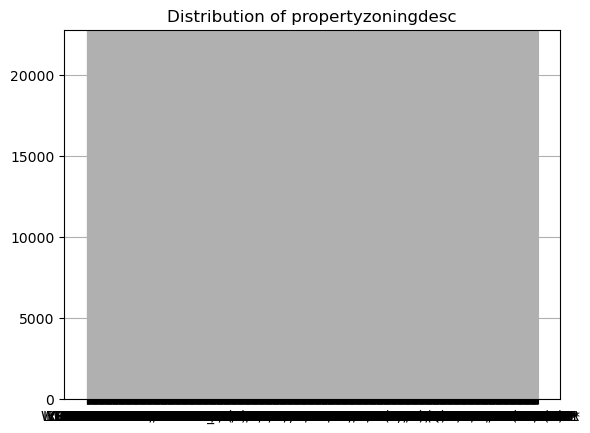

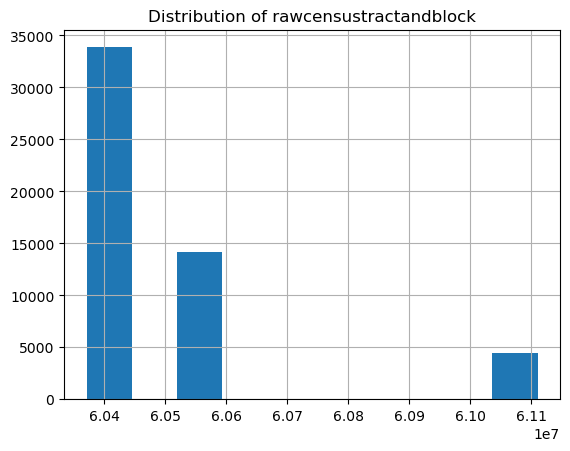

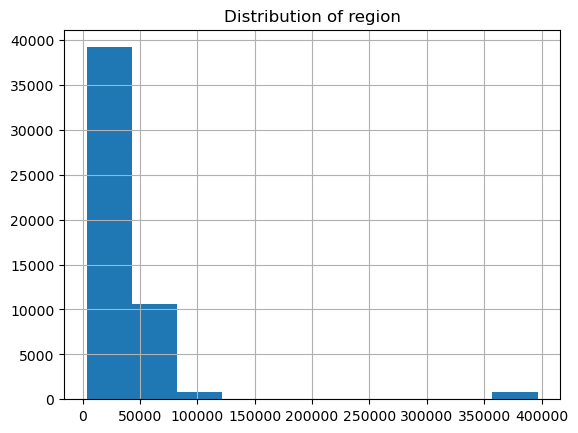

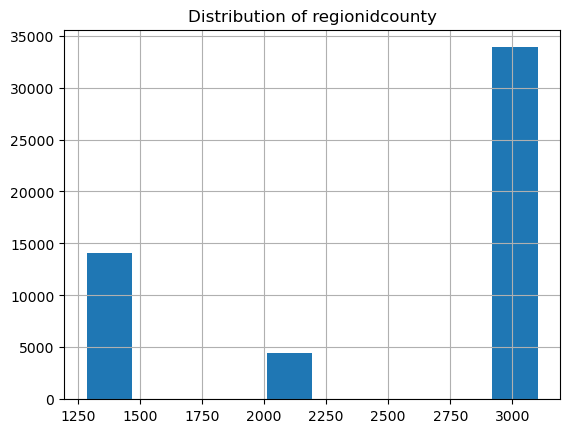

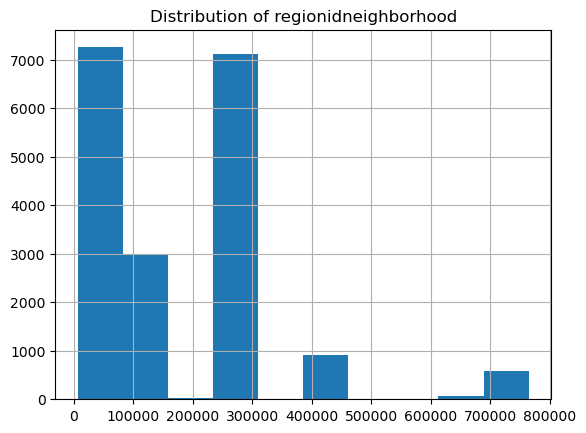

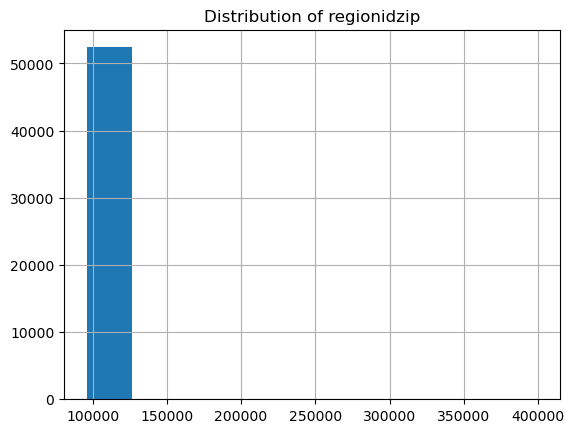

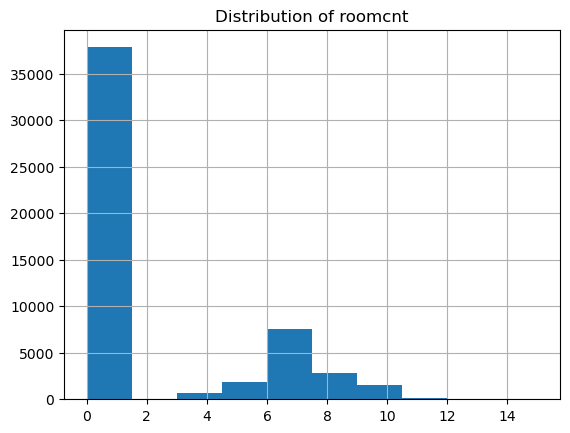

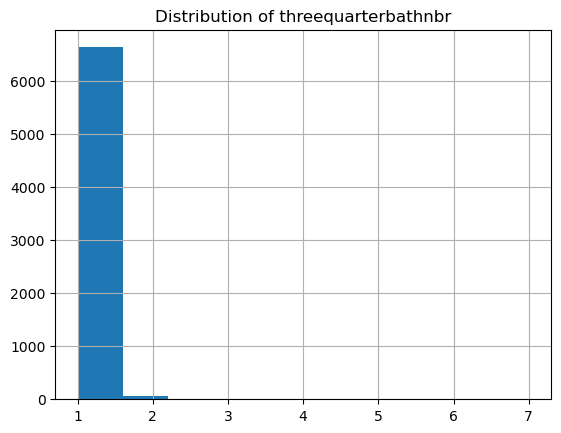

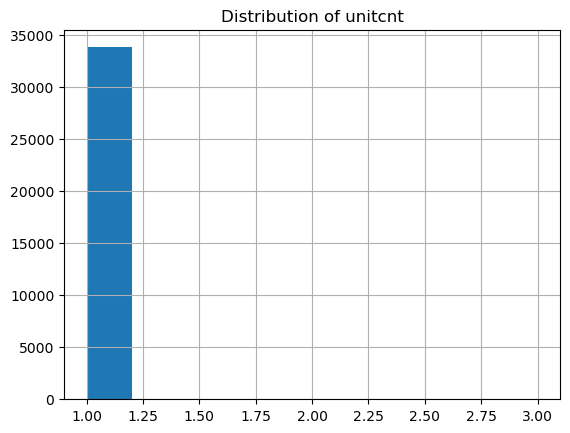

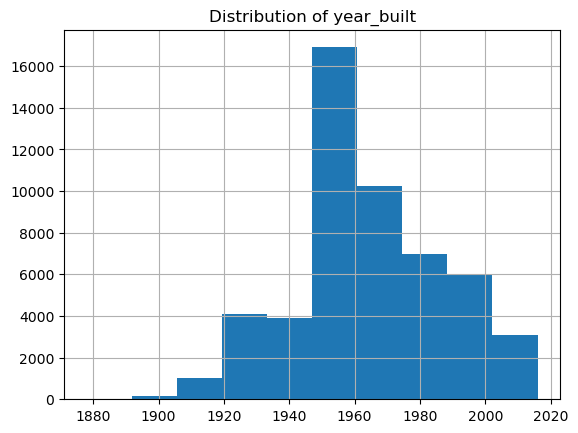

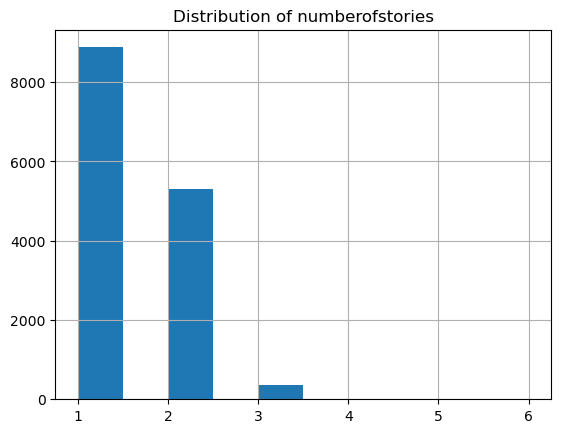

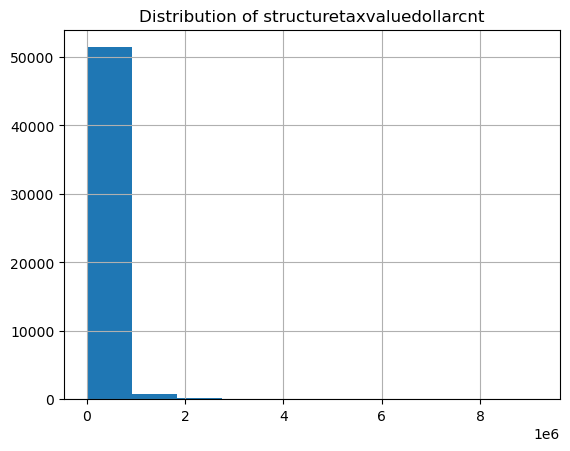

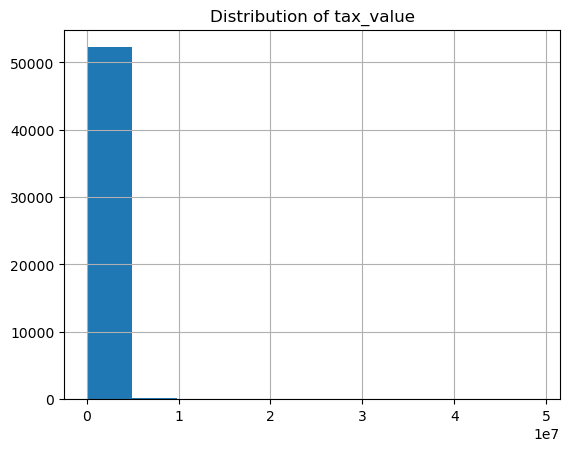

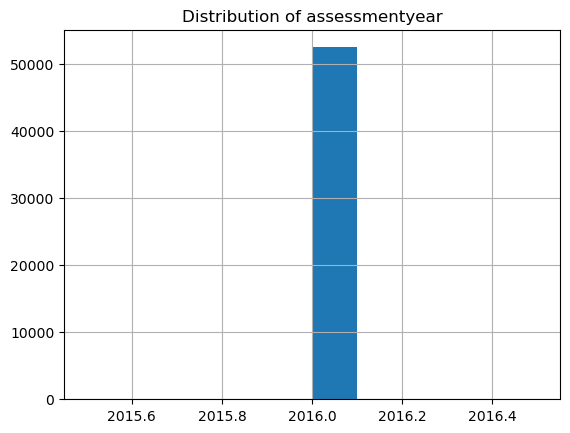

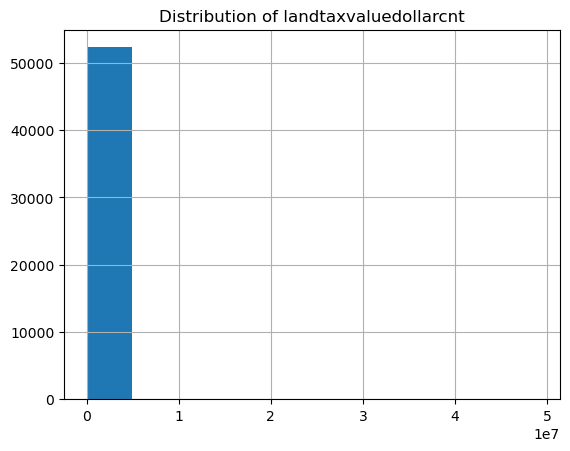

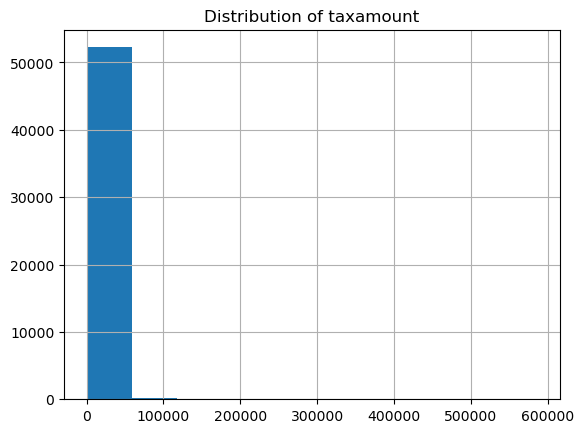

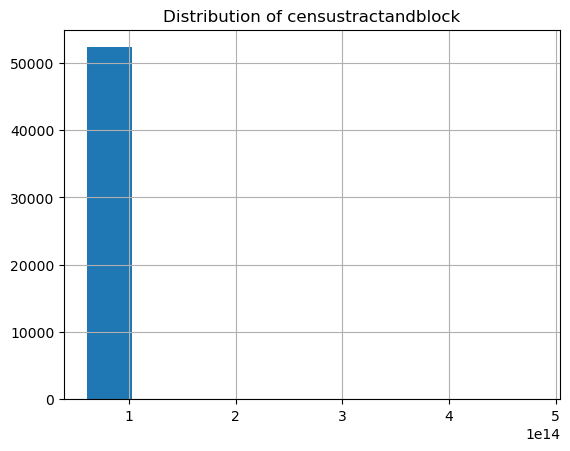

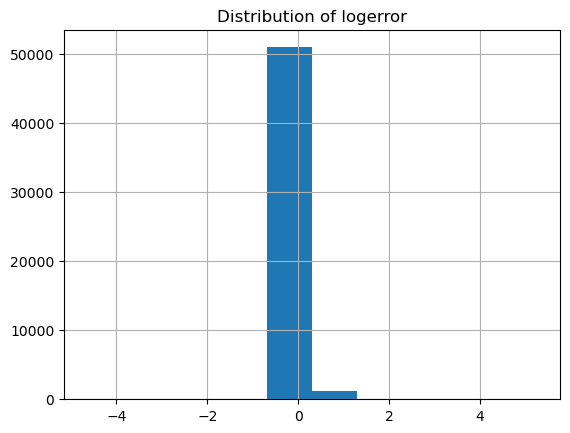

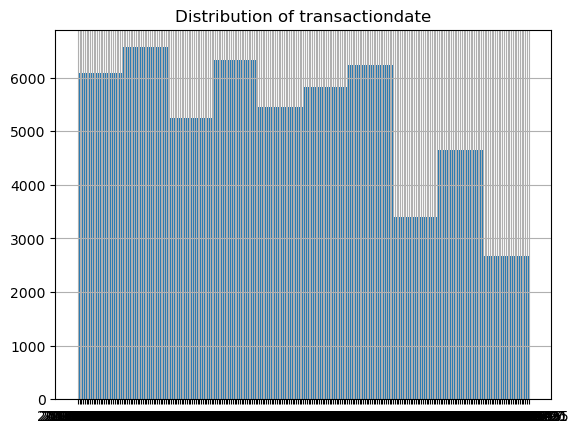

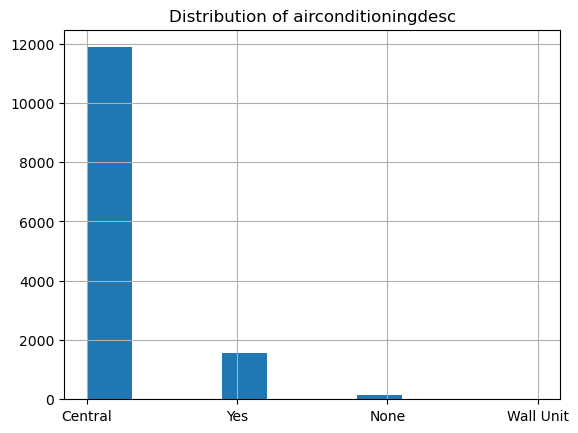

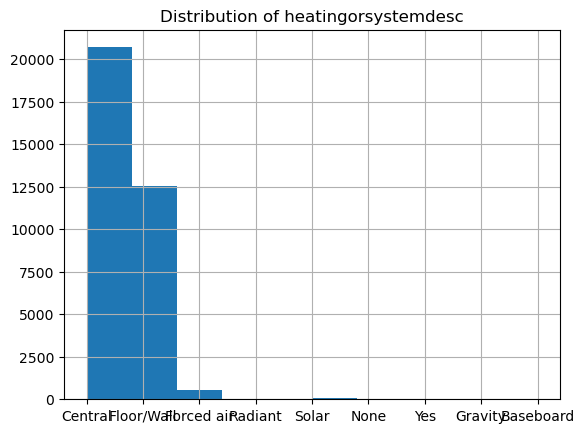

In [5]:
for col in df.columns[:-1]:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

Takeaways:
- the number of houses with central heat is not the same as the houses with central air.
- year_built semms mostly normal, might be good to create bins out of
- regionidneighborhood looks like it could be good to bin
- lot size seems like it probably has some extreme outliers, most are below 1,000,000
- latitude seems normally distributed, could be good for bins
- buildingqualitytypeid might also be good for bins

lets see if logerror is

In [6]:
train.fips.value_counts()

6037.0    18932
6059.0     7918
6111.0     2520
Name: fips, dtype: int64

In [7]:
fips_6037 = train[train.fips == 6037]
fips_6059 = train[train.fips == 6059]
fips_6111 = train[train.fips == 6111]

In [10]:
train.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'bathrooms', 'bedrooms',
       'buildingqualitytypeid', 'calculatedbathnbr', 'area',
       'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt',
       'cars_garage', 'garage_sqft', 'heatingorsystemtypeid', 'latitude',
       'longitude', 'lot_size', 'pools', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'region',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'year_built', 'numberofstories',
       'structuretaxvaluedollarcnt', 'tax_value', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'airconditioningdesc', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

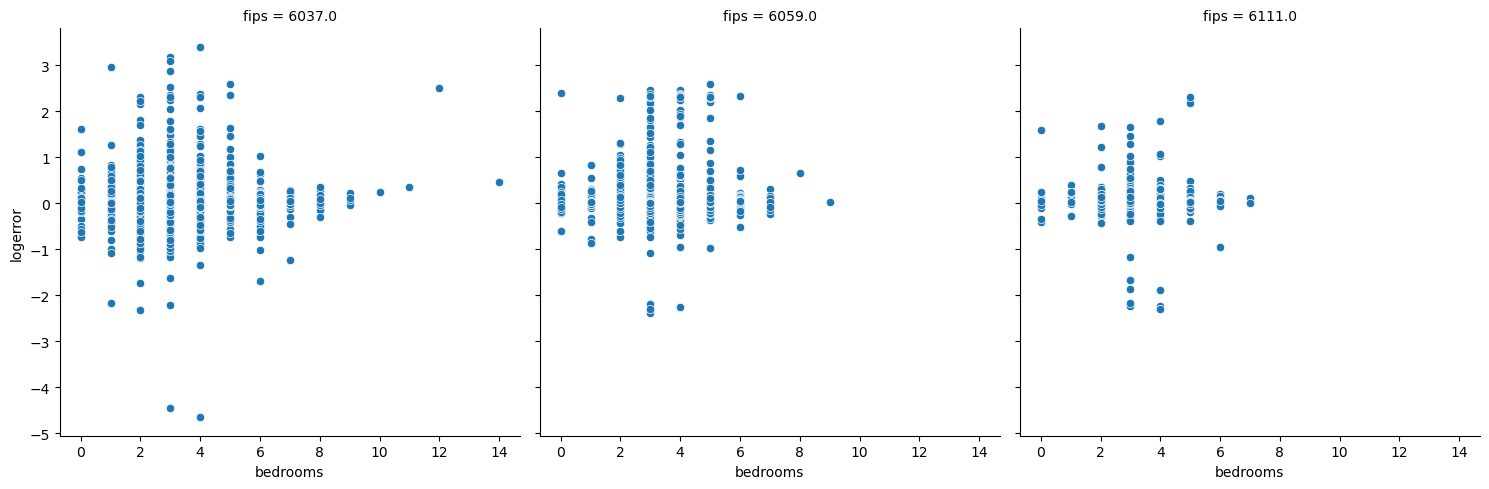

In [11]:
sns.relplot(data=train, x='bedrooms',y='logerror', col='fips')

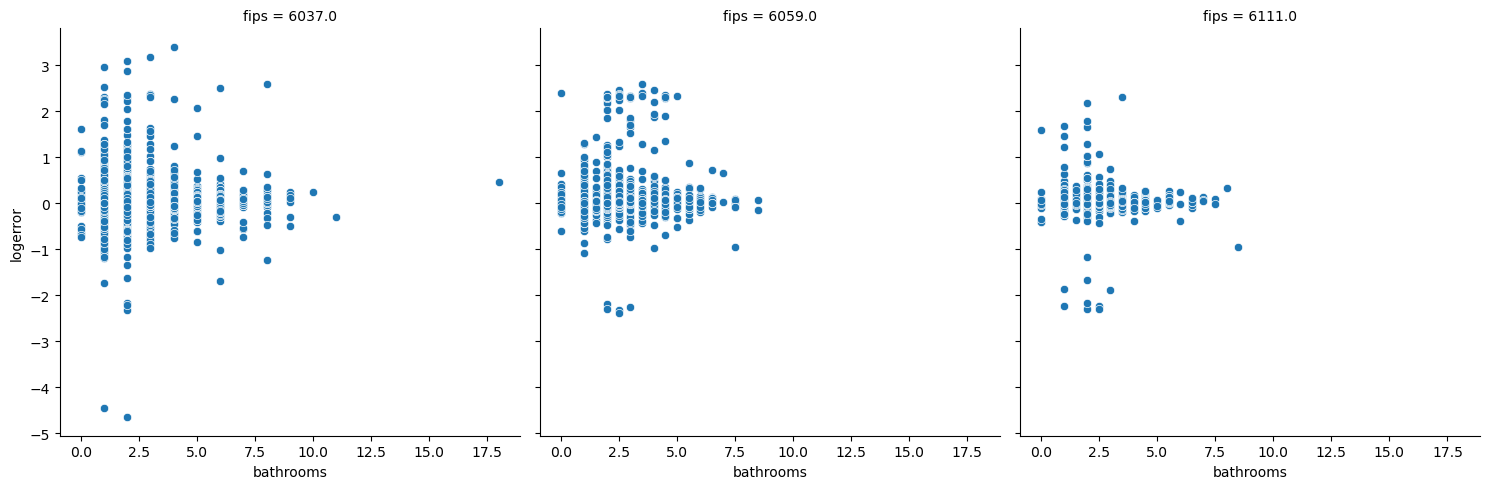

In [12]:
sns.relplot(data=train, x='bathrooms',y='logerror', col='fips')

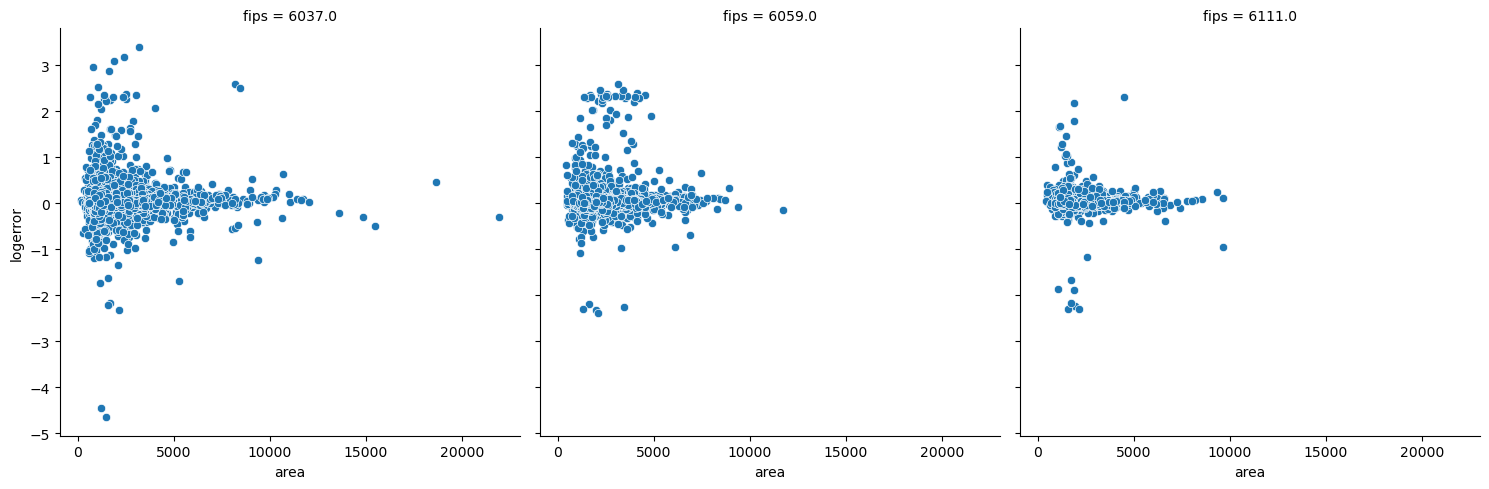

In [13]:
sns.relplot(data=train, x='area',y='logerror', col='fips')

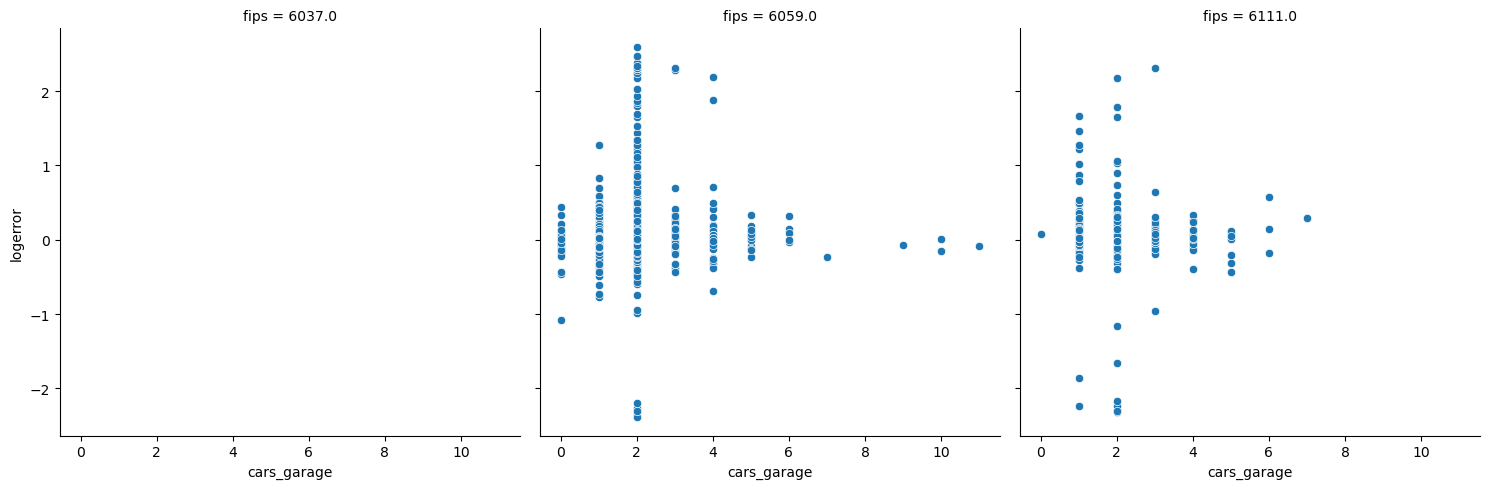

In [14]:
sns.relplot(data=train, x='cars_garage',y='logerror', col='fips')

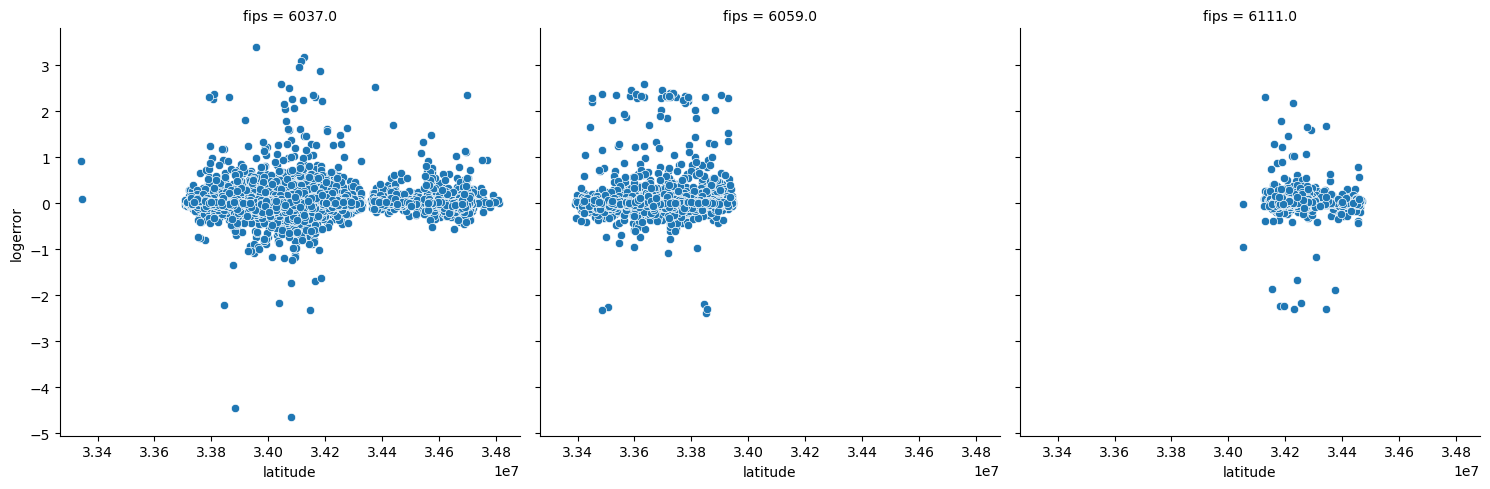

In [15]:
sns.relplot(data=train, x='latitude',y='logerror', col='fips')

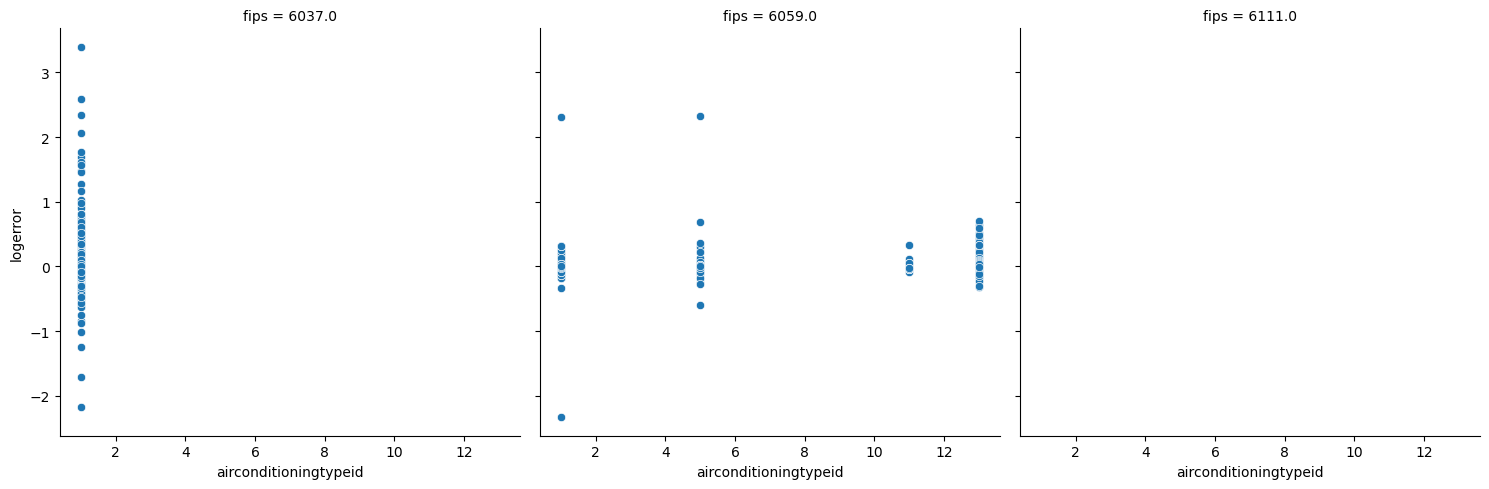

In [17]:
sns.relplot(data=train, x='airconditioningtypeid',y='logerror', col='fips')

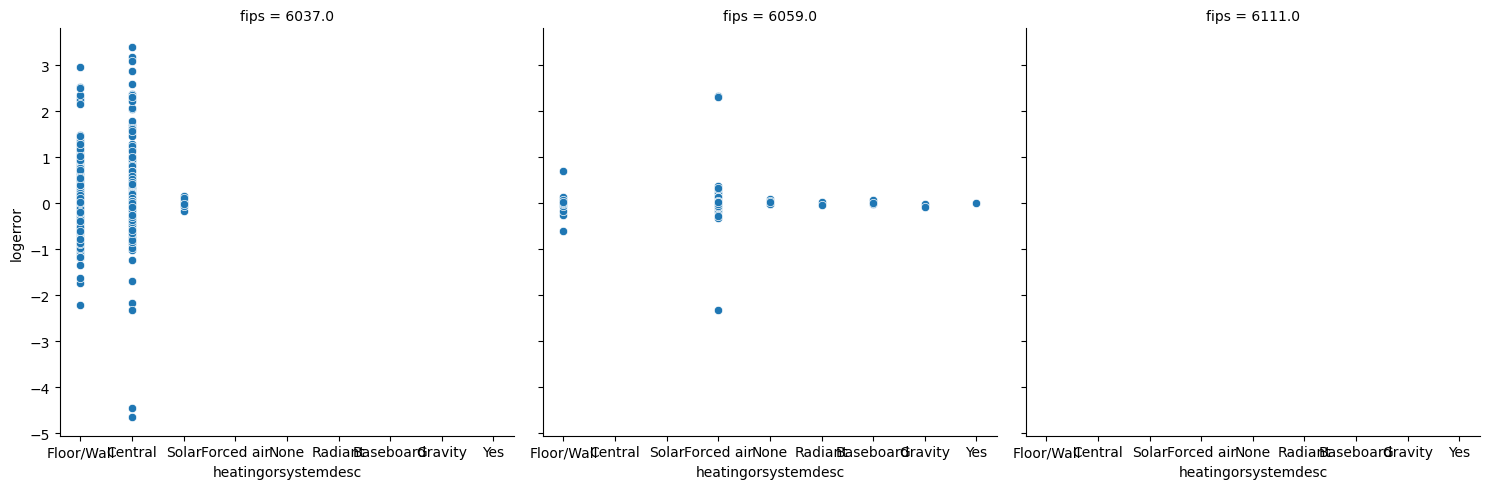

In [18]:
sns.relplot(data=train, x='heatingorsystemdesc',y='logerror', col='fips')

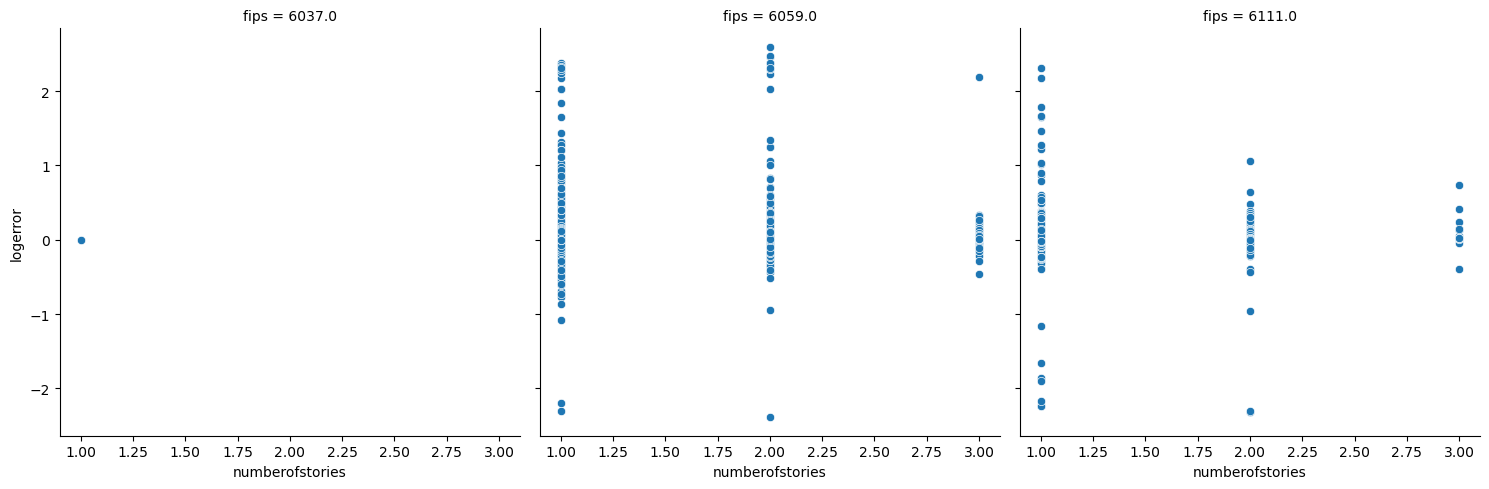

In [19]:
sns.relplot(data=train, x='numberofstories',y='logerror', col='fips')

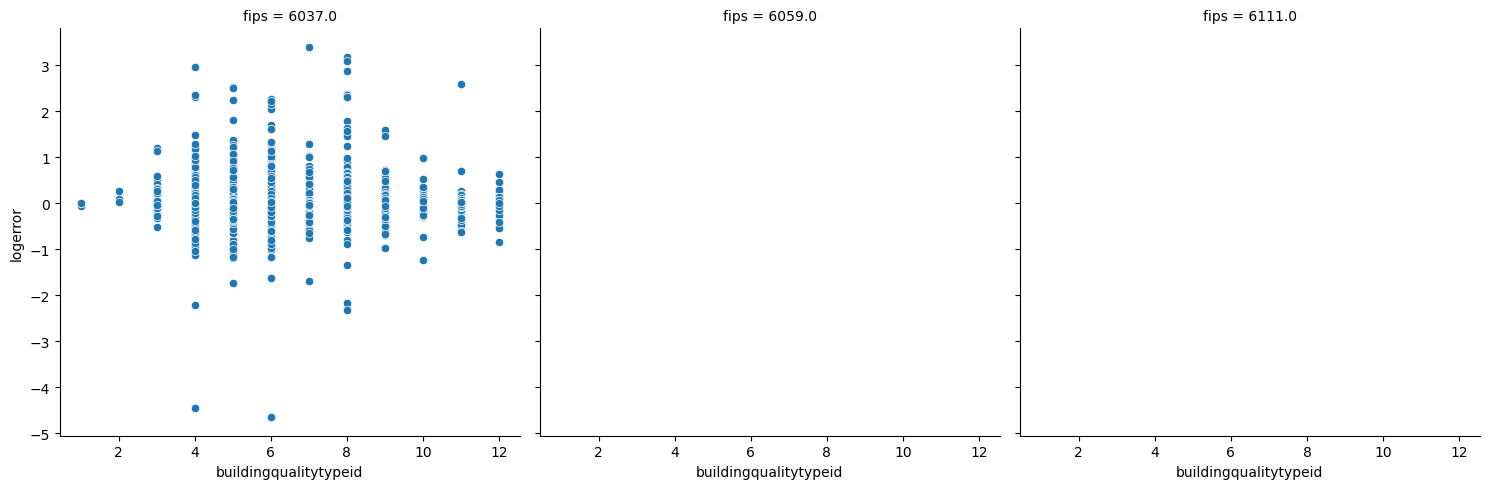

In [20]:
sns.relplot(data=train, x='buildingqualitytypeid',y='logerror', col='fips')

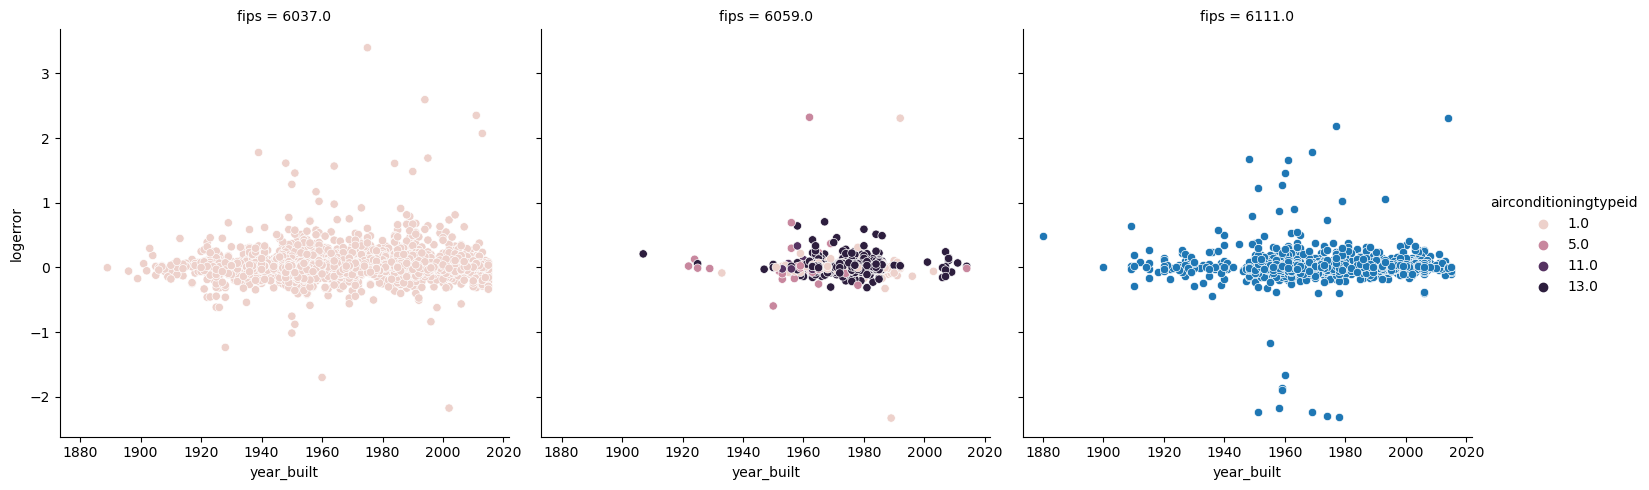

In [26]:
sns.relplot(data=train, x='year_built',y='logerror', hue='airconditioningtypeid', col='fips')

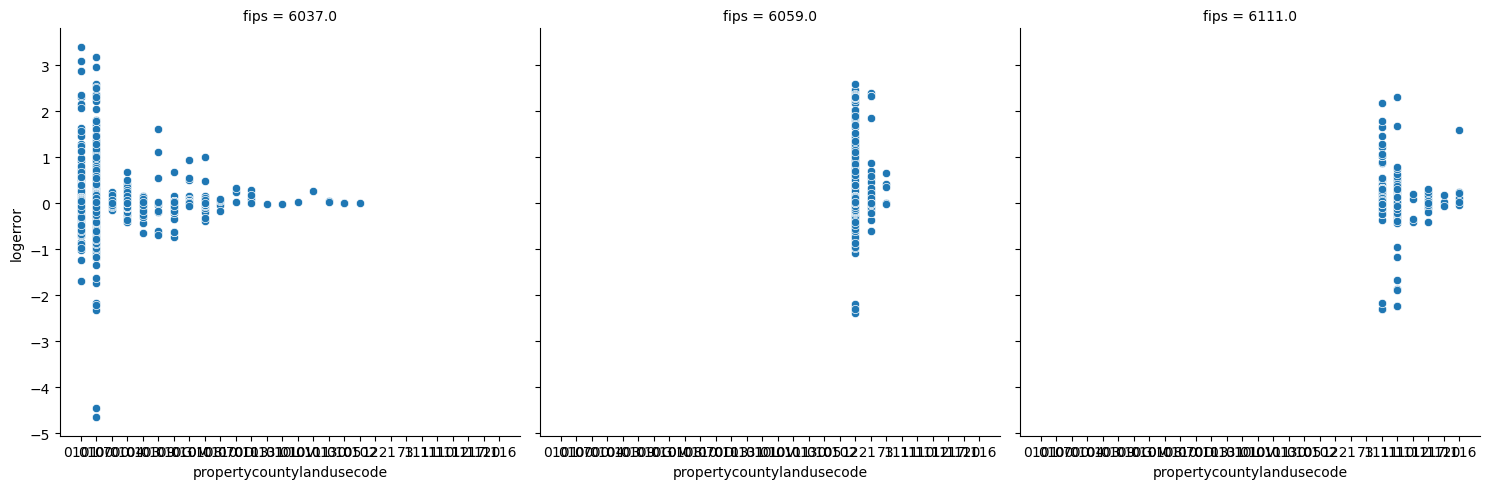

In [27]:
sns.relplot(data=train, x='propertycountylandusecode',y='logerror', col='fips')

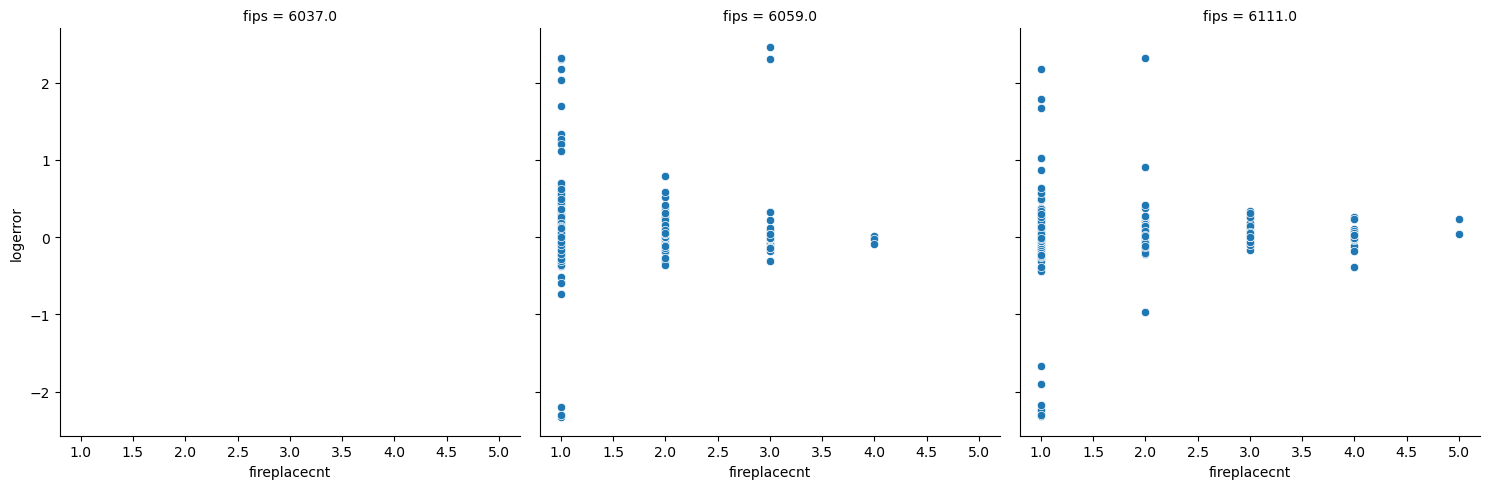

In [28]:
sns.relplot(data=train, x='fireplacecnt',y='logerror', col='fips')

### Takeaways: I don't see any useful paterns when divided by fips

# question: will cutting variable 'rawcensustractandblock' into groups yeild any useful info?

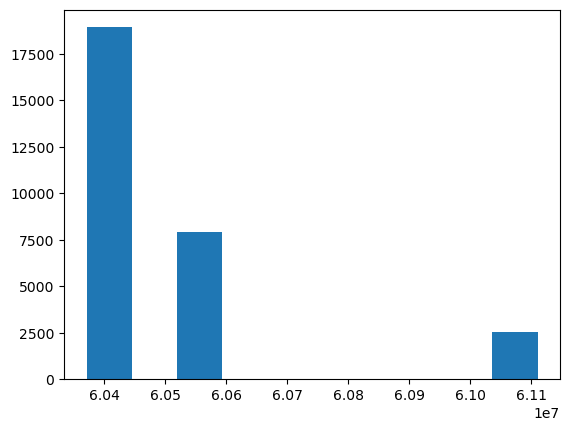

In [70]:
plt.hist(data=train, x='rawcensustractandblock');

In [29]:
train.rawcensustractandblock.value_counts()

6.037920e+07    20
6.059032e+07    15
6.037920e+07    15
6.059032e+07    14
6.037901e+07    13
                ..
6.037409e+07     1
6.037461e+07     1
6.059001e+07     1
6.037480e+07     1
6.037650e+07     1
Name: rawcensustractandblock, Length: 21045, dtype: int64

In [42]:
train['census_cut'] = pd.cut(train.rawcensustractandblock, [0,60_500_000, 60_700_000, 70_000_000], 
       labels=['below 6050', '6050 to 6070', 'above 6070'])

In [43]:
train.census_cut.value_counts()

below 6050      18932
6050 to 6070     7918
above 6070       2520
Name: census_cut, dtype: int64

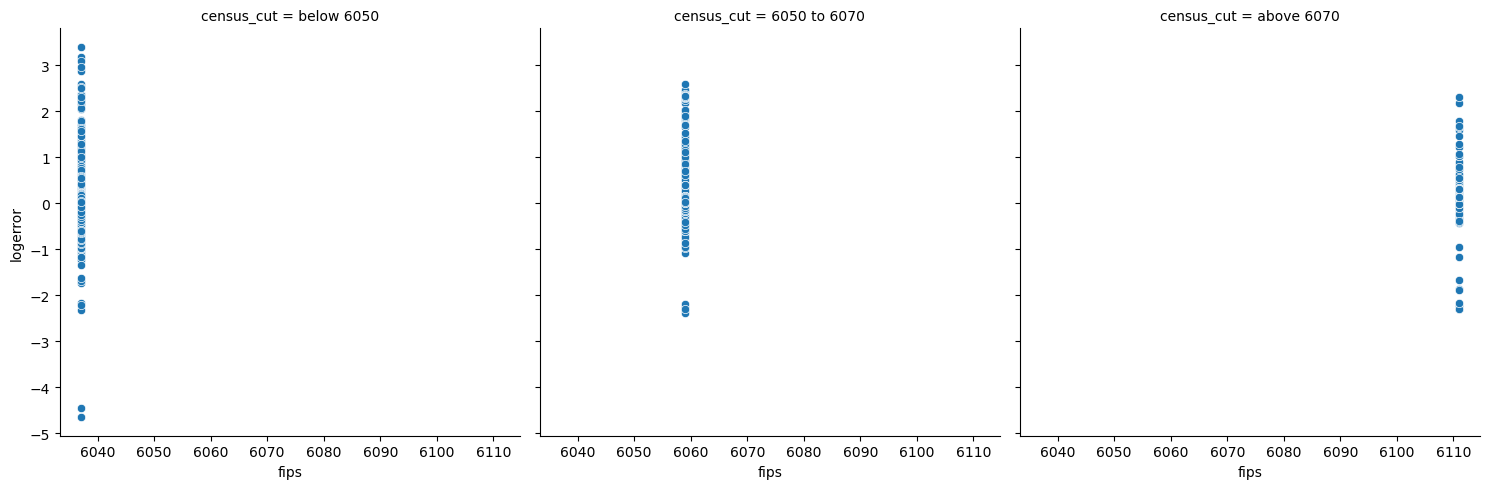

In [44]:
sns.relplot(data=train, x='fips',y='logerror', col='census_cut')

In [37]:
train.fips.value_counts()

6037.0    18932
6059.0     7918
6111.0     2520
Name: fips, dtype: int64

In [45]:
len(train[train.fips == 6037]) == len(train[train.census_cut == 'below 6050'])

True

In [46]:
len(train[train.fips == 6059]) == len(train[train.census_cut == '6050 to 6070'])

True

In [47]:
len(train[train.fips == 6111]) == len(train[train.census_cut == 'above 6070'])

True

## it appears that the first 4 digits of rawcensustractandblock is equal to the fips code, are the last 4 digits the same as another variable?

In [51]:
# what is an example of a rawcensustractandblock number?
train.rawcensustractandblock.iloc[0]

60371111.002013

In [52]:
train.iloc[0]

id                                               226322
parcelid                                       11058219
airconditioningtypeid                               NaN
bathrooms                                           2.0
bedrooms                                            3.0
buildingqualitytypeid                               6.0
calculatedbathnbr                                   2.0
area                                             1130.0
finishedsquarefeet12                             1130.0
fips                                             6037.0
fireplacecnt                                        NaN
fullbathcnt                                         2.0
cars_garage                                         NaN
garage_sqft                                         NaN
heatingorsystemtypeid                               7.0
latitude                                     34269780.0
longitude                                  -118499118.0
lot_size                                        

In [53]:
train.censustractandblock.iloc[0], train.rawcensustractandblock.iloc[0]

(60371111002013.0, 60371111.002013)

### Looks like rawcensustractandblock and censustractandblock are the same, but with a different number of digits

In [56]:
((train.censustractandblock) == (train.rawcensustractandblock * 1000000)).mean()

0.7273408239700374

### but rawcensustractandblock and censustractandblock are different in some places. why?

In [59]:
train[(train.censustractandblock) != (train.rawcensustractandblock * 1000000)]

,id,parcelid,airconditioningtypeid,bathrooms,bedrooms,buildingqualitytypeid,calculatedbathnbr,area,finishedsquarefeet12,fips,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc,census_cut
71137,390879,11190609,1.0,2.0,3.0,8.0,2.0,1428.0,1428.0,6037.0,...,2016.0,36932.0,3150.70,6.037910e+13,-0.022265,2017-08-29,Central,Central,Single Family Residential,below 6050
8112,151415,10996762,NaN,2.0,3.0,4.0,2.0,928.0,928.0,6037.0,...,2016.0,246871.0,3783.34,6.037101e+13,0.047881,2017-02-06,NaN,Floor/Wall,Single Family Residential,below 6050
68181,521293,11317577,1.0,2.0,4.0,7.0,2.0,2152.0,2152.0,6037.0,...,2016.0,47700.0,4393.38,6.037901e+13,-0.029033,2017-08-18,Central,Central,Single Family Residential,below 6050
64736,1610104,17171366,NaN,2.0,3.0,NaN,2.0,2080.0,2080.0,6111.0,...,2016.0,799549.0,12072.60,6.111004e+13,-0.039319,2017-08-09,NaN,NaN,Single Family Residential,above 6070
76313,1271824,11501813,NaN,2.0,3.0,6.0,2.0,1454.0,1454.0,6037.0,...,2016.0,62939.0,1177.05,6.037620e+13,0.186590,2017-09-14,NaN,Floor/Wall,Single Family Residential,below 6050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36214,1274217,12156835,NaN,1.0,3.0,4.0,1.0,1246.0,1246.0,6037.0,...,2016.0,36225.0,1807.19,6.037461e+13,0.007152,2017-05-16,NaN,Floor/Wall,Single Family Residential,below 6050
32436,455270,12500862,NaN,1.0,1.0,5.0,1.0,645.0,645.0,6037.0,...,2016.0,177463.0,2924.13,6.037573e+13,0.028606,2017-05-03,NaN,Floor/Wall,Single Family Residential,below 6050
12304,2092557,11656517,NaN,3.0,2.0,8.0,3.0,1599.0,1599.0,6037.0,...,2016.0,1346195.0,21288.02,6.037194e+13,0.139369,2017-02-24,NaN,Floor/Wall,Single Family Residential,below 6050
17396,1368848,14152759,NaN,2.0,2.0,NaN,2.0,1262.0,1262.0,6059.0,...,2016.0,140792.0,2650.72,6.059001e+13,0.129789,2017-03-16,NaN,NaN,Single Family Residential,6050 to 6070


In [77]:
len(train)

29370

In [61]:
mask = ((train.censustractandblock) != (train.rawcensustractandblock * 1000000))

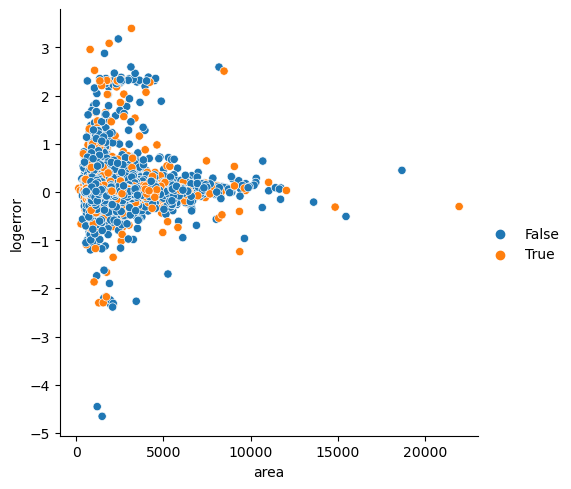

In [64]:
sns.relplot(data=train, x='area',y='logerror', hue=mask)

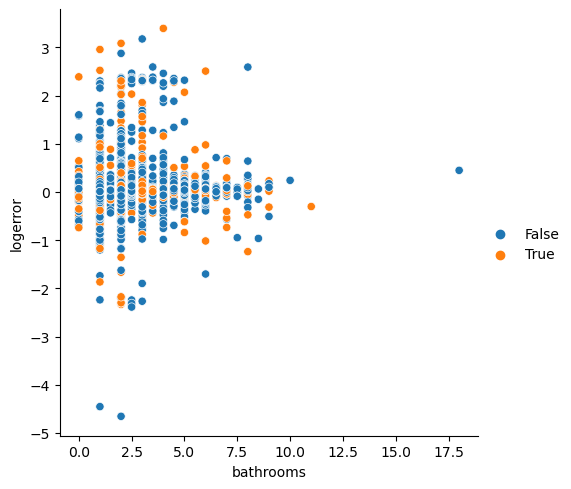

In [65]:
sns.relplot(data=train, x='bathrooms',y='logerror', hue=mask)

### Is there a difference in the logerror for houses with (censustractandblock == rawcensustractandblock * 1_000_000) and houses where it's not equal?
- this is a 2 sample 2-tailed ttest
- need to check if variances are equal

In [67]:
# check for equal variances
# h0 = variances are equal
# ha = variances differ
stats.levene(train[mask].logerror, train[~mask].logerror)

LeveneResult(statistic=0.08557434575333661, pvalue=0.769882780462203)

variances are equal

- h_0 : logerror is the same
- h_a : logerror is different

In [68]:
stats.ttest_ind(train[mask].logerror, train[~mask].logerror, equal_var=True)

Ttest_indResult(statistic=0.3042829017712353, pvalue=0.7609145262872116)

# Fail to reject the null. Logerror is the same. Yay

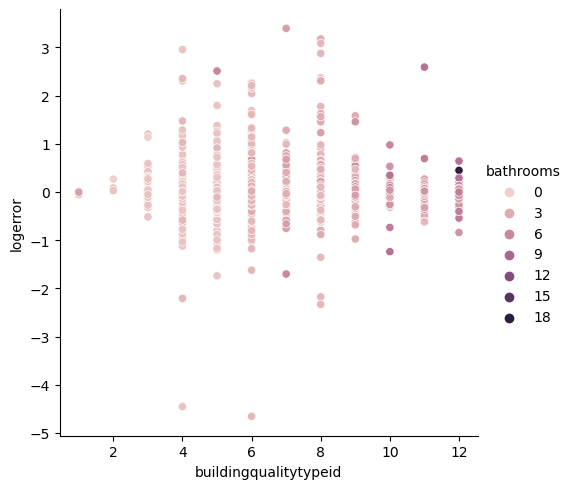

In [76]:
sns.relplot(data=fips_6037, x='buildingqualitytypeid',y='logerror', hue='bathrooms');